In [1]:
def featureExtraction(fileDir, minCount, maxCount, leftLight):
    userHp1 = []
    userLp1 = []
    userLhpl1 = []
    userLlpl1 = []
    userHpl1 = []
    userLpl1 = []
    userLhpg1 = []
    userLlpg1 = []
    userRhpg1 = []
    userRlpg1 = []
    userBlink1 = []
    userNotBlink1 = []
    
    for count in range(minCount, maxCount):
        file = open(fileDir + '/file' + str(count) + '-' + str(leftLight) + '.txt', 'r')
        x = file.read()
        file.close()
    
        x = x.split(',')
    
        data1 = []
    
        for index, item in enumerate(x):
            data1.append(float(item))
        
        for index, item in enumerate(x):
            if(index != len(data1) -1):
                data1[index] = data1[index + 1]
            
        temp = 0
        index = 0

        start1 = []
        middle1 = []
        finish1 = []

        for i in range(0, len(data1)):
            if((temp + 150 < i) and (data1[i] > 100)):
                for j in range(i, 0, -1):
                    if(data1[j] <= 0):
                        start1.append(j)
                        break
                
                for j in range(start1[index] + 1, len(data1)):
                    if(data1[j] <= 0):
                        middle1.append(j)
                        break
                
                for j in range(middle1[index] + 1, len(data1)):
                    if(data1[j] >= 0):
                        finish1.append(j)
                        break
                
                i = finish1[index]
                index = index + 1
                temp = i
   
        temp = 0
    
        hp1 = []
        lp1 = []
        lhpl1 = []
        llpl1 = []
        hpl1 = []
        lpl1 = []
        lhpg1 = []
        llpg1 = []
        rhpg1 = []
        rlpg1 = []
        blink1 = []
        notBlink1 = []
    
        index = 0;
    
        for i in range(start1[0], finish1[len(finish1) - 1]):
            hp1.append(0)
            lp1.append(0)
            lhpl1.append(0)
            llpl1.append(0)
            hpl1.append(0)
            lpl1.append(0)
            lhpg1.append(0)
            llpg1.append(0)
            rhpg1.append(0)
            rlpg1.append(0)
            blink1.append(0)
            notBlink1.append(0)
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] < data1[j]):
                    hp1[index] = data1[j]
                    lhpl1[index] = j - start1[index]
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] > data1[j]):
                    lp1[index] = data1[j]
                    llpl1[index] = j - start1[index]
            
            hpl1[index] = middle1[index] - start1[index]
            lpl1[index] = finish1[index] - middle1[index]
    
            lhpg1[index] = hp1[index] / lhpl1[index]
            llpg1[index] = lp1[index] / llpl1[index]
            rhpg1[index] = hp1[index] / (hpl1[index] - lhpg1[index])
            rlpg1[index] = lp1[index] / (lpl1[index] - llpl1[index])
    
            index = index + 1
    
            if(len(start1) == index):
                break
    
            i = start1[index]
        
        index = 0;
        
        for i in range(0, len(finish1)):
            blink1[i] = finish1[i] - start1[i]

        for i in range(0, len(finish1) - 1):
            notBlink1[i] = start1[i + 1] - finish1[i]
        
        for i in range(0, len(finish1)):
            userHp1.append(hp1[i])
            userLp1.append(lp1[i])
            userLhpl1.append(lhpl1[i])
            userLlpl1.append(llpl1[i])
            userHpl1.append(hpl1[i])
            userLpl1.append(lpl1[i])
            userLhpg1.append(lhpg1[i])
            userLlpg1.append(llpg1[i])
            userRhpg1.append(rhpg1[i])
            userRlpg1.append(rlpg1[i])
            userBlink1.append(blink1[i])
            userNotBlink1.append(notBlink1[i])
            
    return userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1

In [2]:
user1Data  = []
user1Label = []

In [3]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user1', 0, 49, 1)

In [4]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user1', 0, 49, 2)

In [5]:
sum = len(userHp1) +len(userHp2)

In [6]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [7]:
for i in range(0, sum):
    user1Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user1Label.append(0)

In [8]:
user2Data  = []
user2Label = []

In [9]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user2', 0, 49, 1)

In [10]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user2', 0, 49, 2)

In [11]:
sum = len(userHp1) +len(userHp2)

In [12]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [13]:
for i in range(0, sum):
    user2Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user2Label.append(1)

In [14]:
user3Data  = []
user3Label = []

In [15]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 1)

In [16]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 2)

In [17]:
sum = len(userHp1) +len(userHp2)

In [18]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [19]:
for i in range(0, sum):
    user3Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user3Label.append(2)

In [20]:
import numpy as np

In [21]:
user1Data = np.array(user1Data)
user2Data = np.array(user2Data)
user3Data = np.array(user3Data)

user1Label = np.array(user1Label)
user2Label = np.array(user2Label)
user3Label = np.array(user3Label)

In [22]:
data = np.concatenate((user1Data, user2Data, user3Data), axis=0)

In [23]:
len(data)

3239

In [24]:
label = np.concatenate((user1Label, user2Label, user3Label), axis=0)

In [25]:
len(label)

3239

In [26]:
s = np.arange(data.shape[0])
np.random.shuffle(s)

In [27]:
data = data[s]
label = label[s]

In [28]:
label

array([2, 1, 1, ..., 1, 0, 1])

In [29]:
tempLabel = []
testLabel = label[2600:]

In [30]:
for i in range(0, len(label)):
    if(label[i] == 0):
        tempLabel.append([1, 0, 0])
    elif(label[i] == 1):
        tempLabel.append([0, 1, 0])
    else:
        tempLabel.append([0, 0, 1])

In [31]:
label = tempLabel

In [32]:
label = np.array(label)

In [33]:
train_data = data[:2000]
val_data = data[2000:2600]
test_data = data[2600:]

train_label = label[:2000]
val_label = label[2000:2600]
test_label = label[2600:]

In [34]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

In [35]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score


import matplotlib as mpl
import matplotlib.pyplot as plt

In [37]:
def build_model(actiFunc, lossFunc, hidden, node, dropout):
    model = models.Sequential()
    
    model.add(layers.Dense(node[0], activation=actiFunc, input_shape=(12, )))
    model.add(layers.Dropout(dropout))
    
    if(hidden == 2):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    if(hidden == 3):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='rmsprop', loss=lossFunc, metrics=['accuracy'])
    return model

Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
______________________

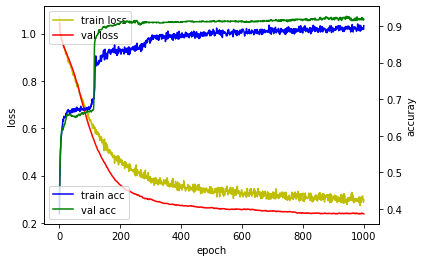

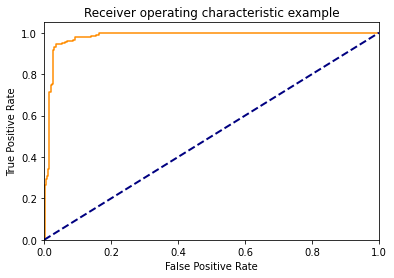





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
__________________

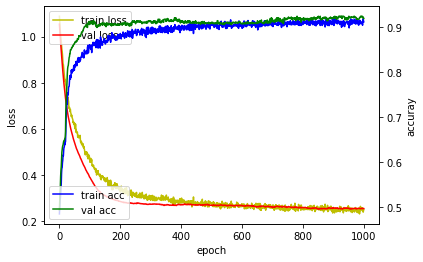

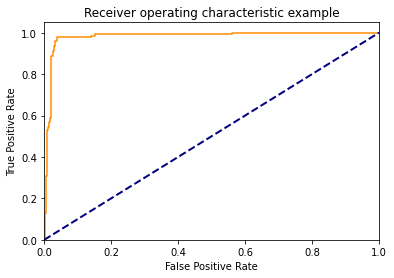





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________

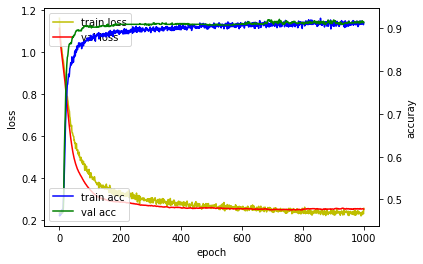

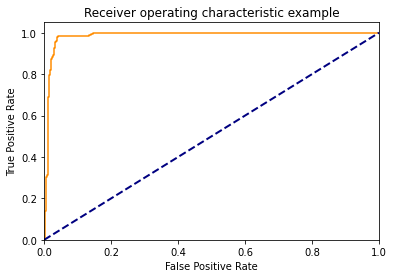





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_11 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                288       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________

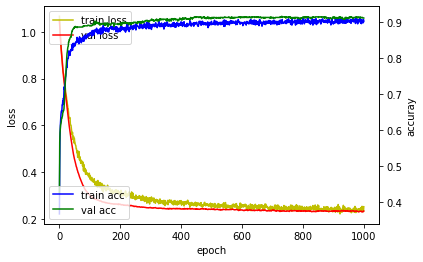

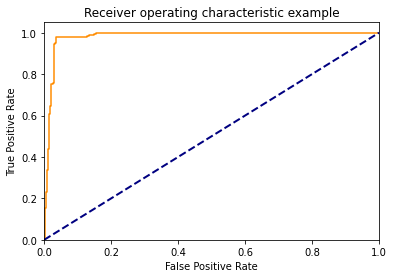





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 68        
_________________________________________________________________
dropout_15 (Dropout)         (None, 4)                 0         
_________________

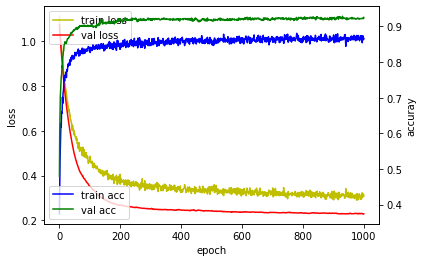

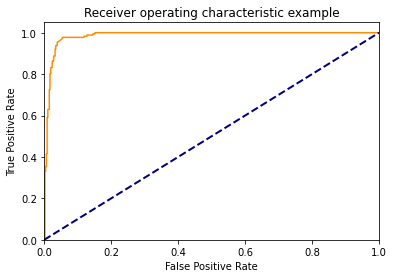





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_17 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_18 (Dropout)         (None, 8)                 0         
_________________

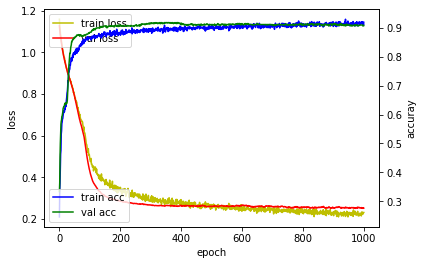

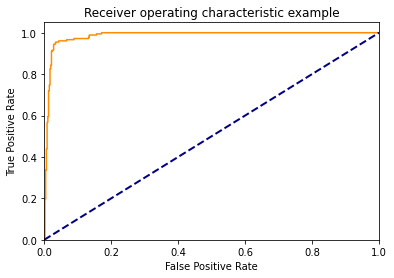





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_19 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_20 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
________________

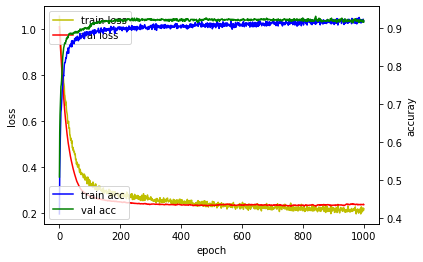

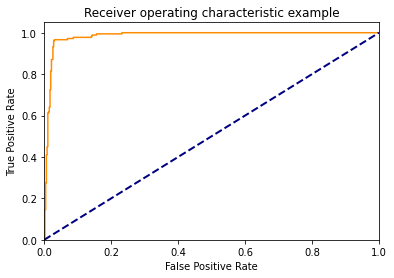





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_22 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_23 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_24 (Dropout)         (None, 32)                0         
________________

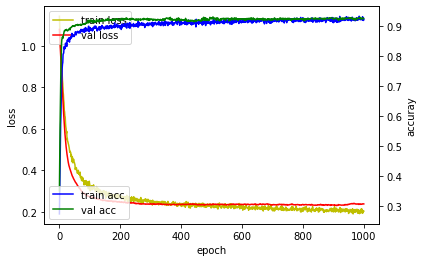

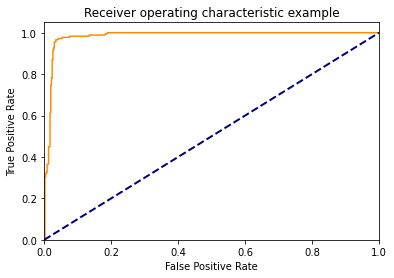





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_25 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_26 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 132       
_________________________________________________________________
dropout_27 (Dropout)         (None, 4)                 0         
_________________

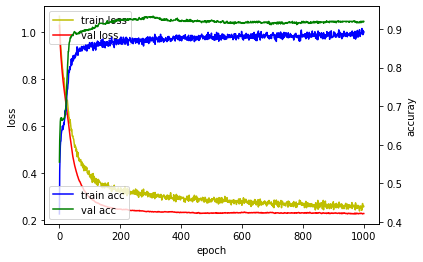

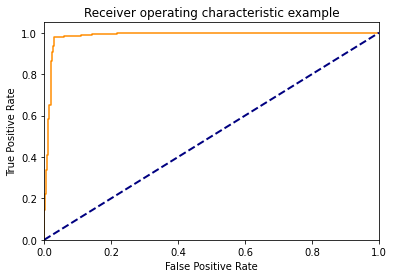





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_28 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_30 (Dropout)         (None, 8)                 0         
_________________

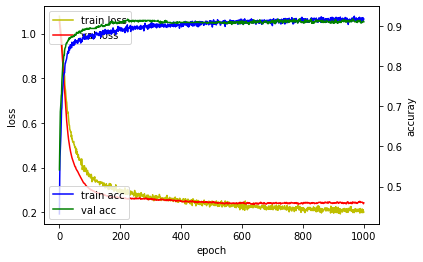

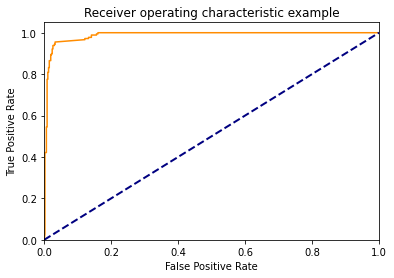





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_31 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_32 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_33 (Dropout)         (None, 16)                0         
________________

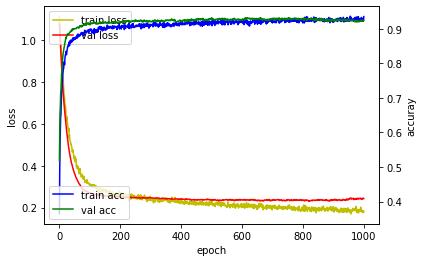

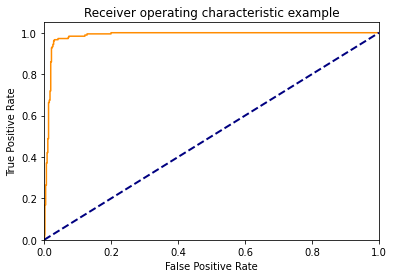





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_34 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_35 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_36 (Dropout)         (None, 32)                0         
________________

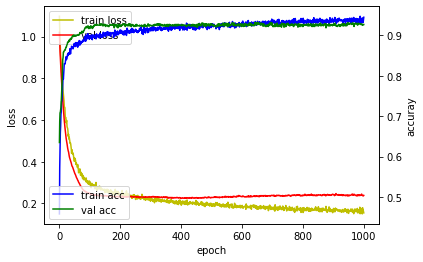

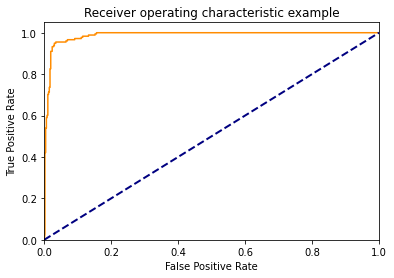





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_37 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_38 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_51 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_39 (Dropout)         (None, 4)                 0         
__________________

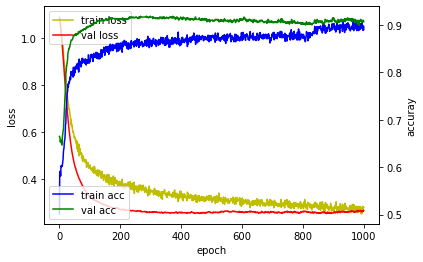

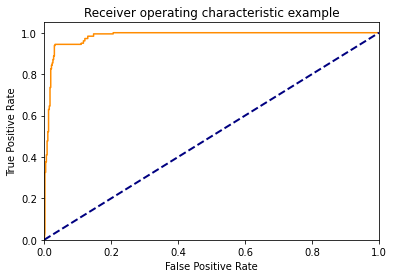





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_40 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_41 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_42 (Dropout)         (None, 8)                 0         
__________________

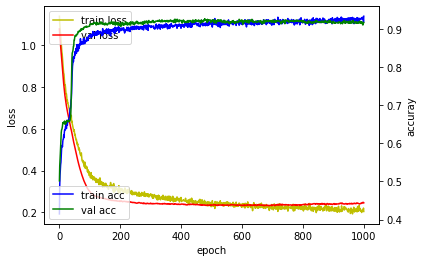

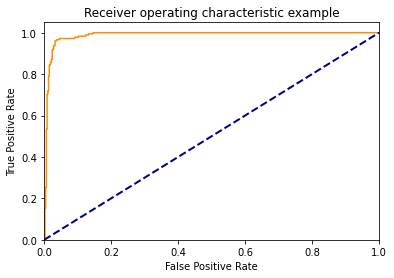





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_43 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_44 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_59 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_45 (Dropout)         (None, 16)                0         
_________________

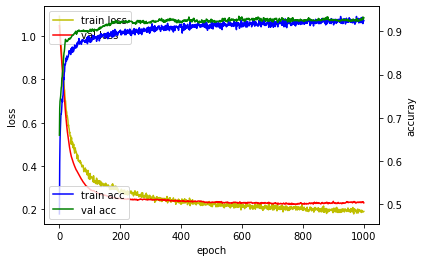

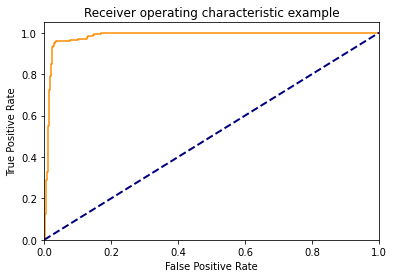





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_46 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_47 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_63 (Dense)             (None, 32)                288       
_________________________________________________________________
dropout_48 (Dropout)         (None, 32)                0         
_________________

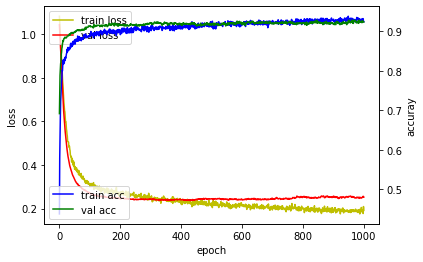

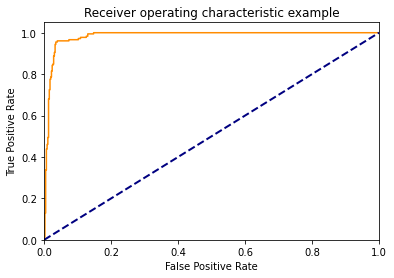





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_49 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_50 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 4)                 68        
_________________________________________________________________
dropout_51 (Dropout)         (None, 4)                 0         
_________________

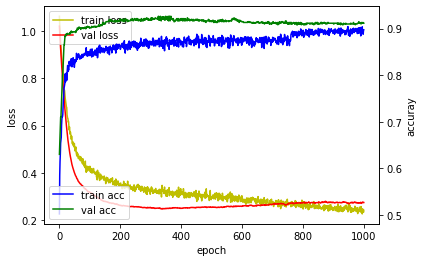

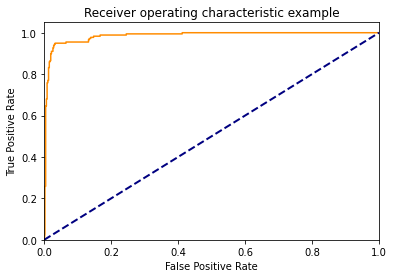





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_52 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_53 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_54 (Dropout)         (None, 8)                 0         
_________________

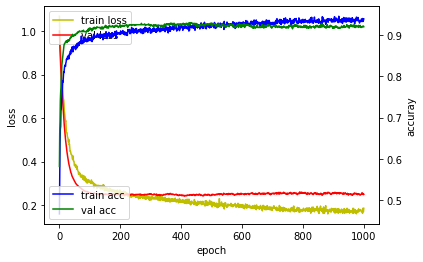

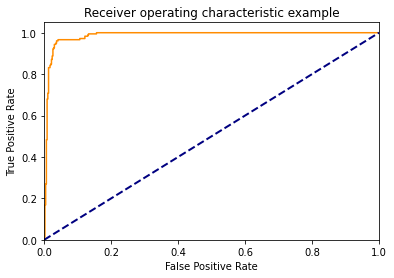





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_55 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_56 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_57 (Dropout)         (None, 16)                0         
________________

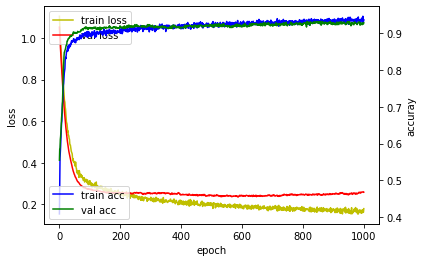

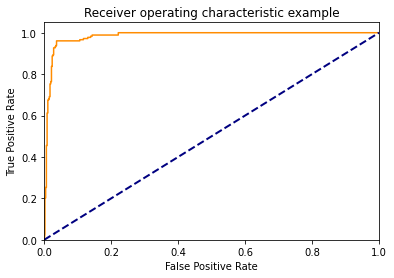





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_58 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_59 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_60 (Dropout)         (None, 32)                0         
________________

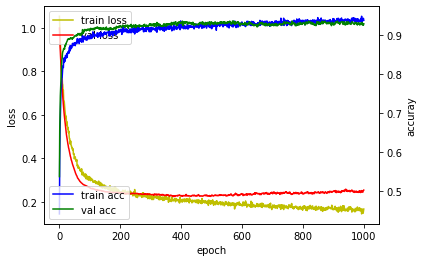

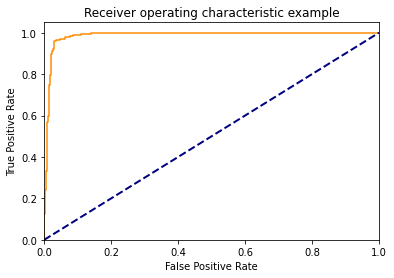





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_61 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_62 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 4)                 132       
_________________________________________________________________
dropout_63 (Dropout)         (None, 4)                 0         
_________________

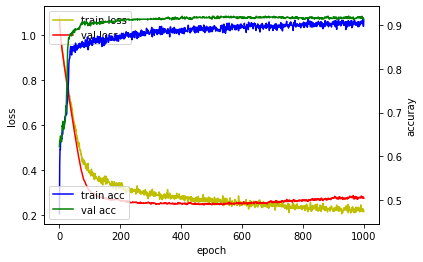

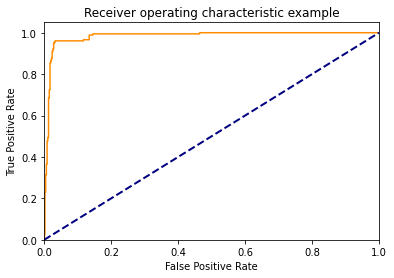





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_64 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_65 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_87 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_66 (Dropout)         (None, 8)                 0         
_________________

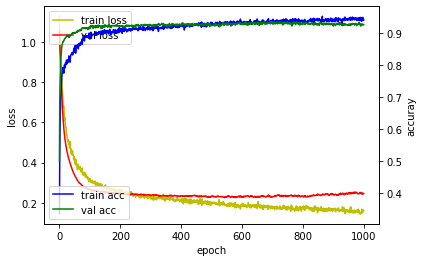

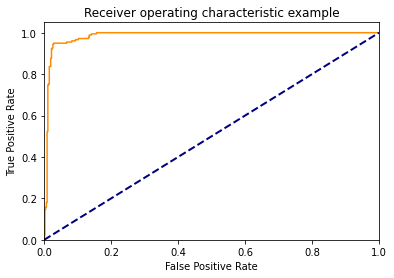





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_67 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_90 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_68 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_69 (Dropout)         (None, 16)                0         
________________

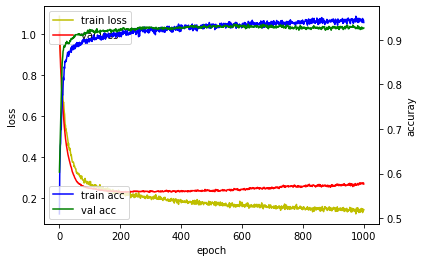

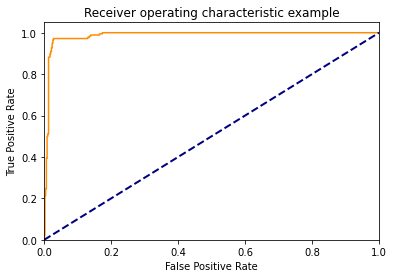





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_70 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_71 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_72 (Dropout)         (None, 32)                0         
________________

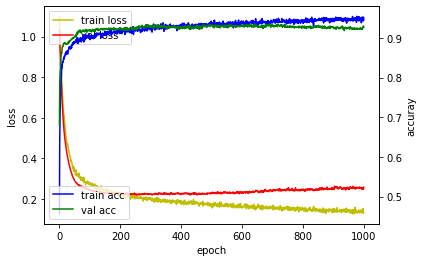

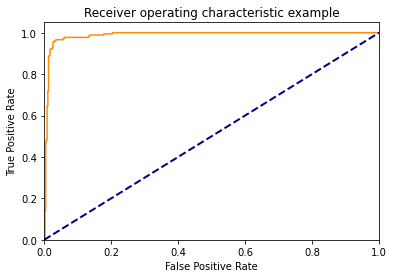





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_73 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_74 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_99 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_75 (Dropout)         (None, 4)                 0         
_______________

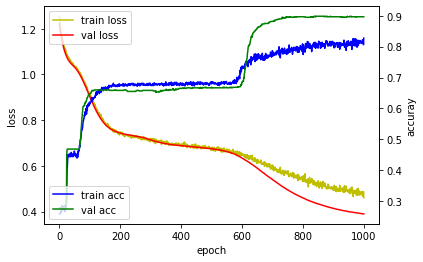

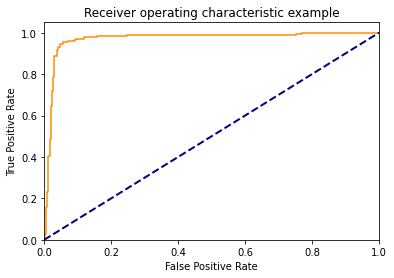





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_76 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_102 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_77 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_103 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_78 (Dropout)         (None, 8)                 0         
_______________

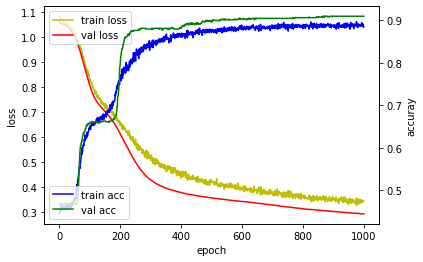

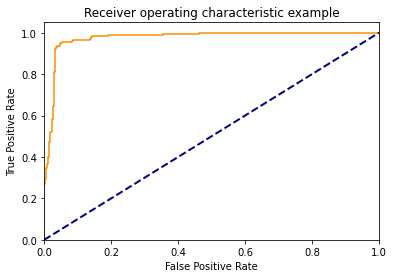





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_79 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_106 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_80 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_107 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_81 (Dropout)         (None, 16)                0         
______________

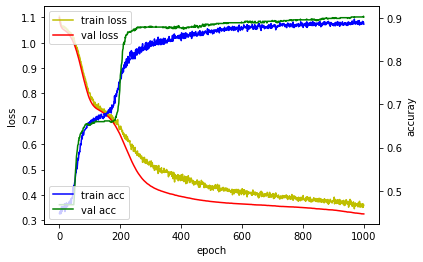

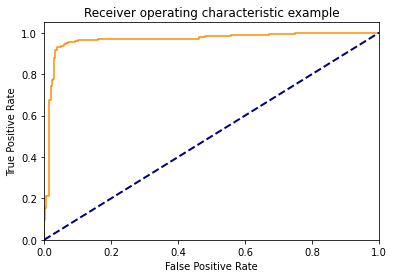





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_82 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_83 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_111 (Dense)            (None, 32)                288       
_________________________________________________________________
dropout_84 (Dropout)         (None, 32)                0         
______________

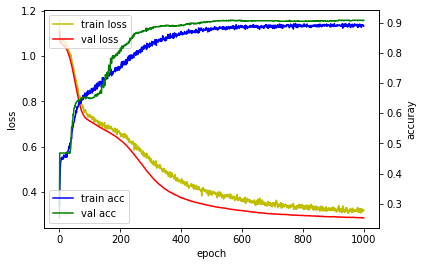

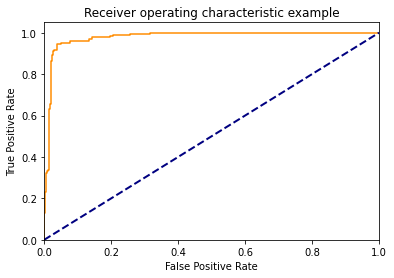





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_85 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_114 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_86 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_115 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_87 (Dropout)         (None, 4)                 0         
______________

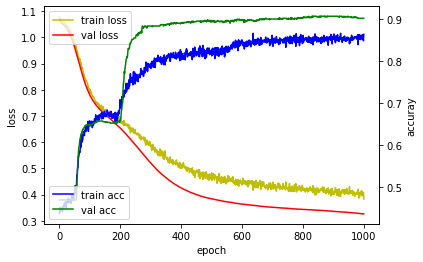

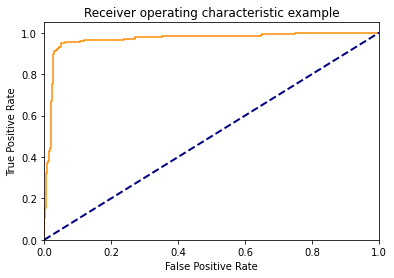





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_88 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_118 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_89 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_90 (Dropout)         (None, 8)                 0         
______________

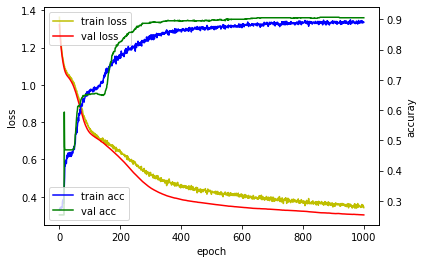

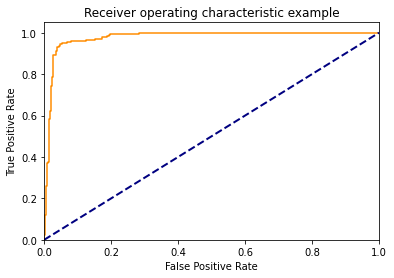





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_91 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_92 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_93 (Dropout)         (None, 16)                0         
_____________

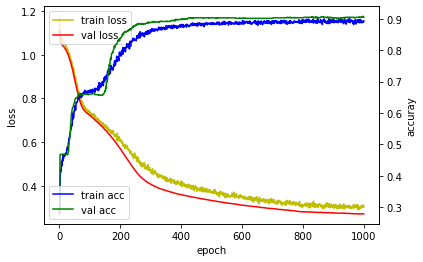

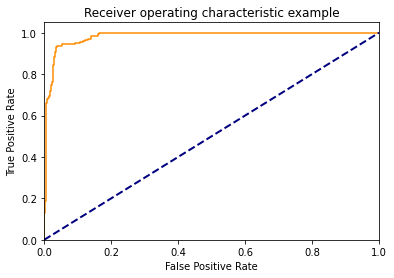





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_94 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_126 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_95 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_96 (Dropout)         (None, 32)                0         
_____________

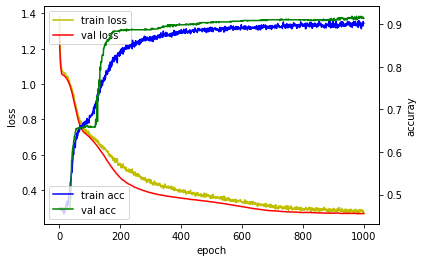

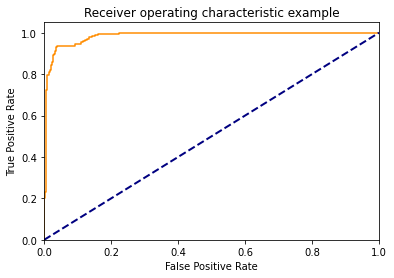





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_97 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_130 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_98 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_131 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_99 (Dropout)         (None, 4)                 0         
______________

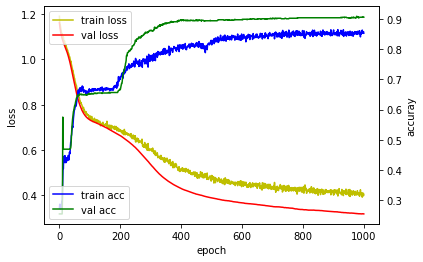

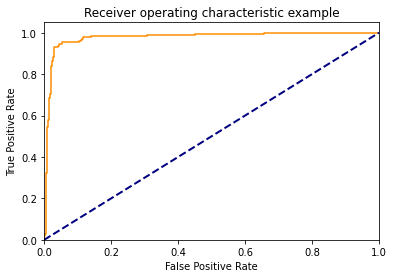





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_100 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_134 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_101 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_135 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_102 (Dropout)        (None, 8)                 0         
______________

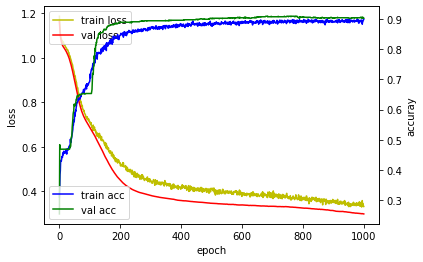

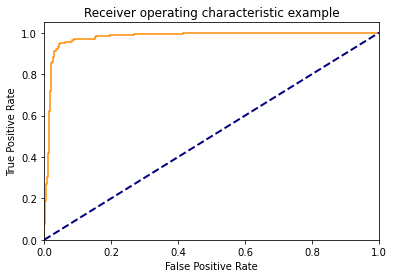





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_103 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_138 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_104 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_139 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_105 (Dropout)        (None, 16)                0         
_____________

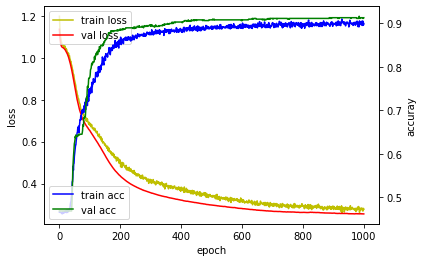

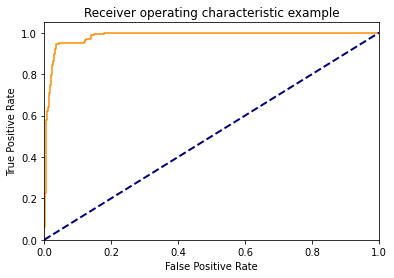





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_106 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_142 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_107 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_143 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_108 (Dropout)        (None, 32)                0         
_____________

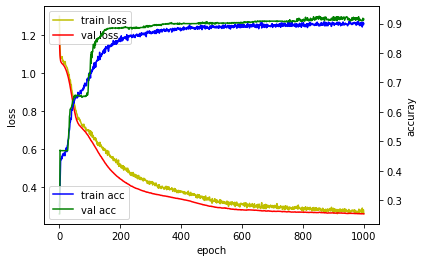

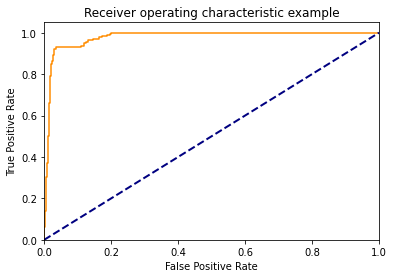





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_109 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_146 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_110 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_147 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_111 (Dropout)        (None, 4)                 0         
_______________

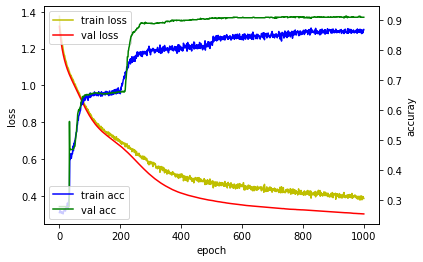

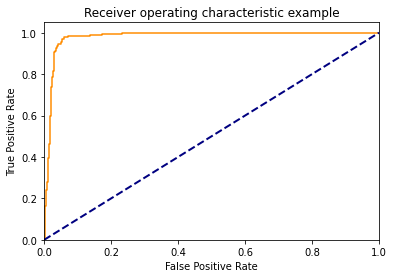





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_112 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_150 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_113 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_151 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_114 (Dropout)        (None, 8)                 0         
_______________

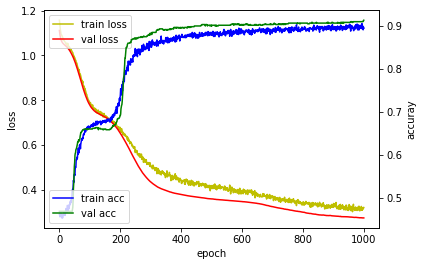

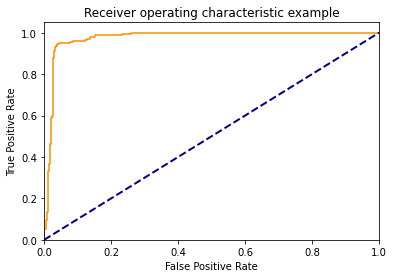





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_115 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_154 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_116 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_155 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_117 (Dropout)        (None, 16)                0         
______________

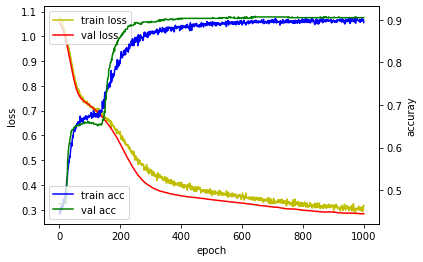

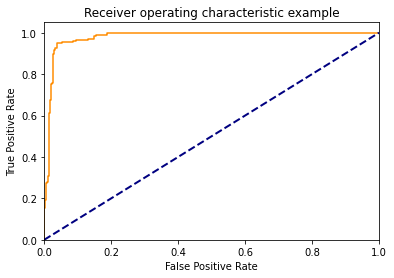





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_118 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_158 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_119 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_159 (Dense)            (None, 32)                288       
_________________________________________________________________
dropout_120 (Dropout)        (None, 32)                0         
______________

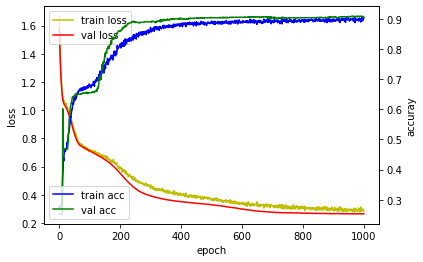

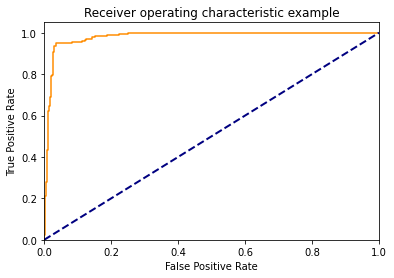





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_121 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_162 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_122 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_163 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_123 (Dropout)        (None, 4)                 0         
______________

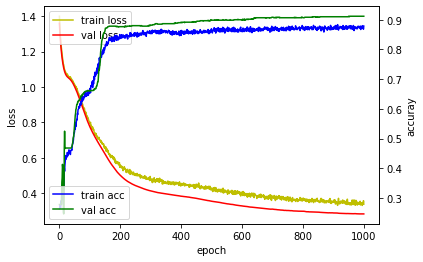

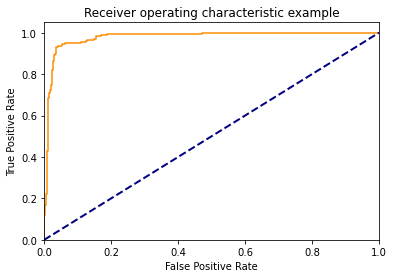





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_124 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_166 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_125 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_167 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_126 (Dropout)        (None, 8)                 0         
______________

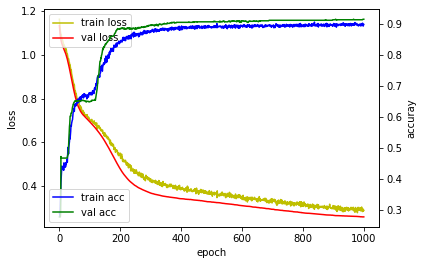

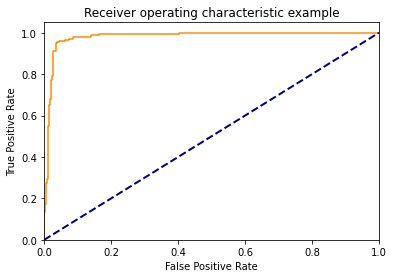





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_127 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_170 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_128 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_171 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_129 (Dropout)        (None, 16)                0         
_____________

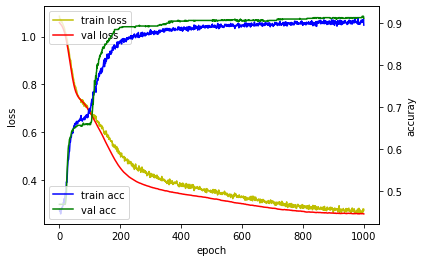

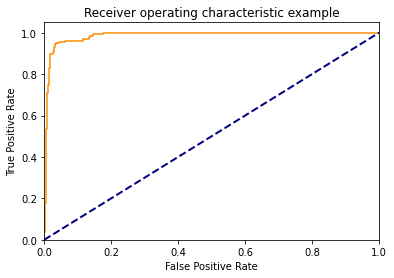





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_130 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_174 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_131 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_175 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_132 (Dropout)        (None, 32)                0         
_____________

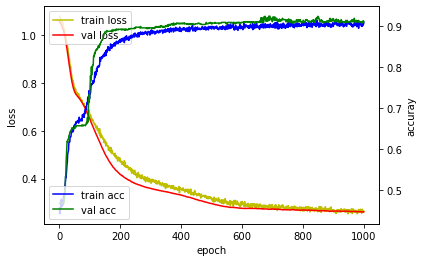

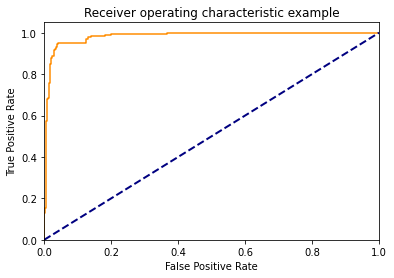





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_133 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_178 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_134 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_179 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_135 (Dropout)        (None, 4)                 0         
______________

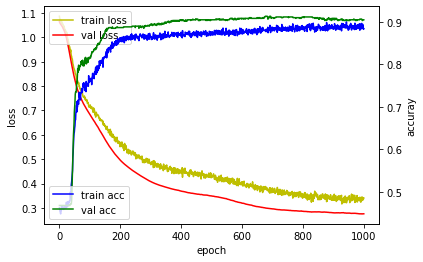

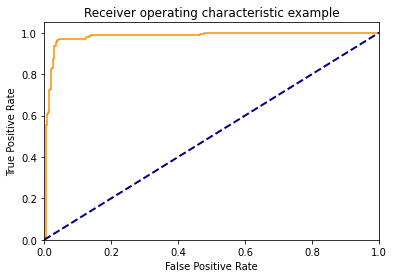





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_136 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_182 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_137 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_183 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_138 (Dropout)        (None, 8)                 0         
______________

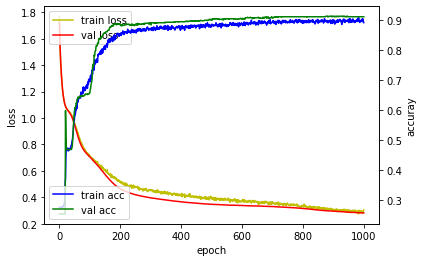

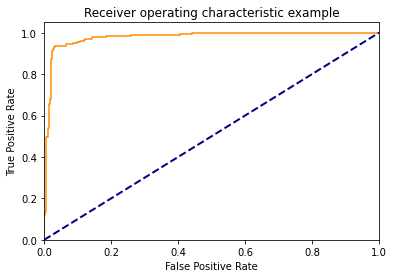





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_185 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_139 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_186 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_140 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_187 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_141 (Dropout)        (None, 16)                0         
_____________

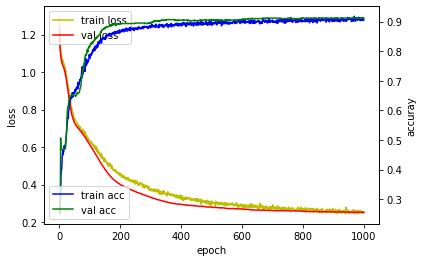

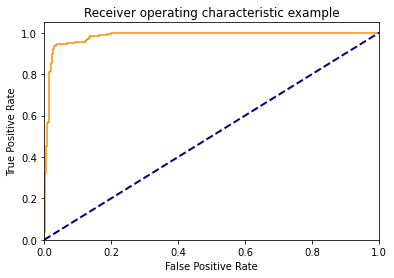





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_142 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_190 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_143 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_191 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_144 (Dropout)        (None, 32)                0         
_____________

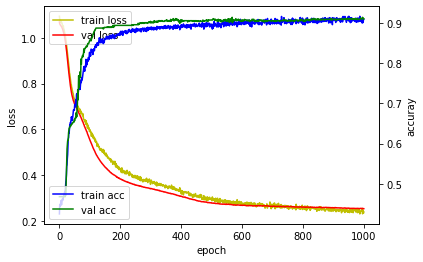

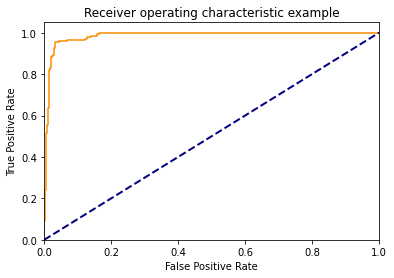





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_145 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_194 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_146 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_195 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_147 (Dropout)        (None, 4)                 0         
___________________

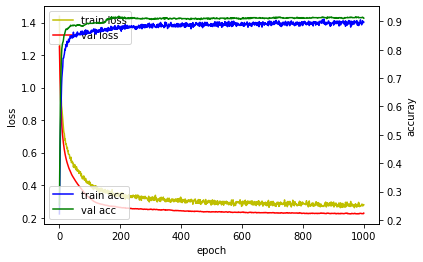

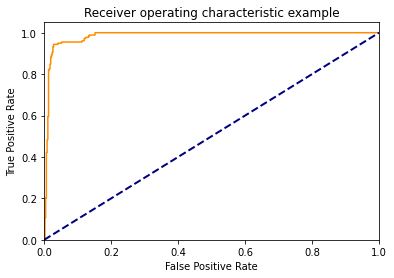





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_148 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_198 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_149 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_199 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_150 (Dropout)        (None, 8)                 0         
___________________

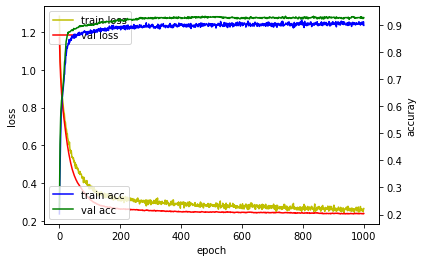

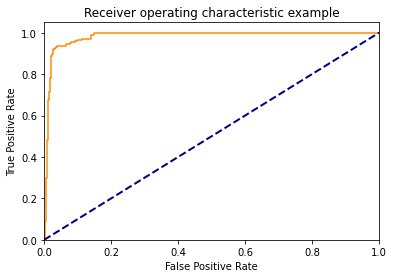





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_151 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_202 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_152 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_203 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_153 (Dropout)        (None, 16)                0         
__________________

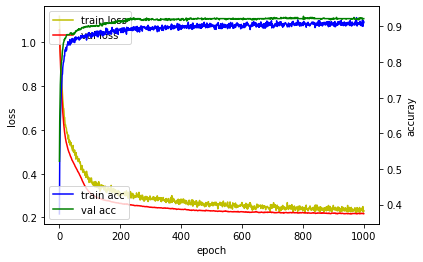

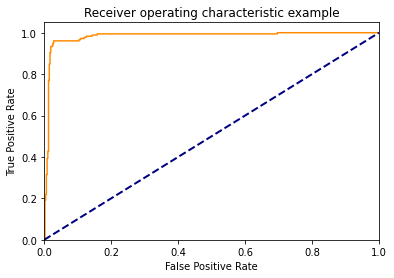





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_205 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_154 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_206 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_155 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_207 (Dense)            (None, 32)                288       
_________________________________________________________________
dropout_156 (Dropout)        (None, 32)                0         
__________________

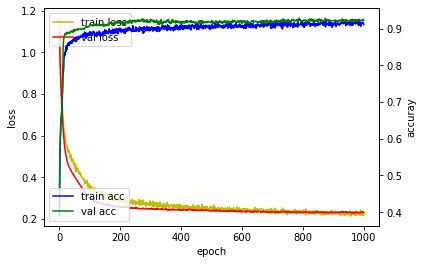

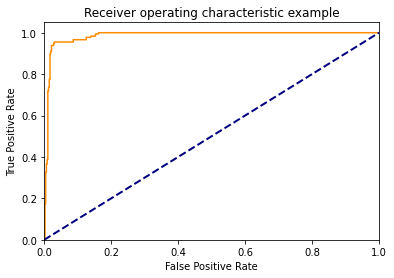





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_209 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_157 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_210 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_158 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_211 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_159 (Dropout)        (None, 4)                 0         
__________________

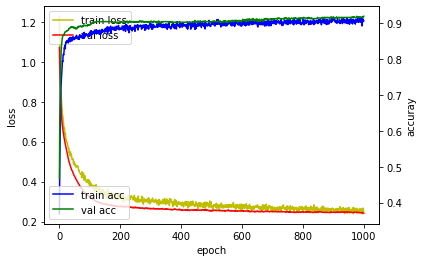

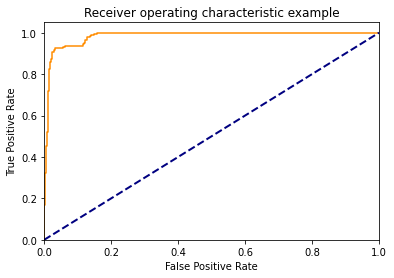





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_213 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_160 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_214 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_161 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_215 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_162 (Dropout)        (None, 8)                 0         
__________________

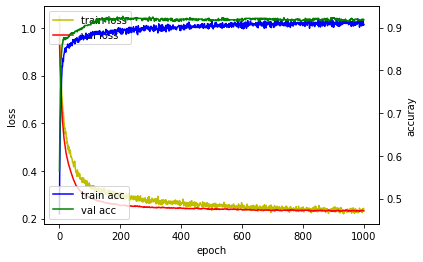

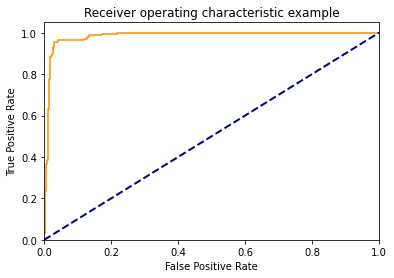





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_217 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_163 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_218 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_164 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_219 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_165 (Dropout)        (None, 16)                0         
_________________

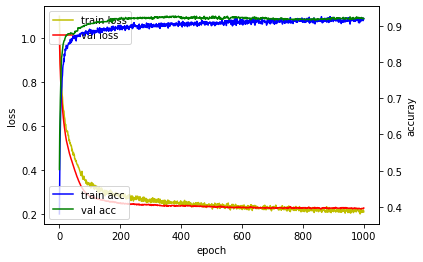

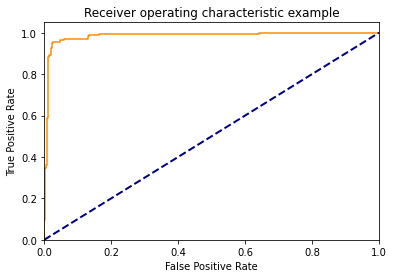





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_221 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_166 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_222 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_167 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_223 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_168 (Dropout)        (None, 32)                0         
_________________

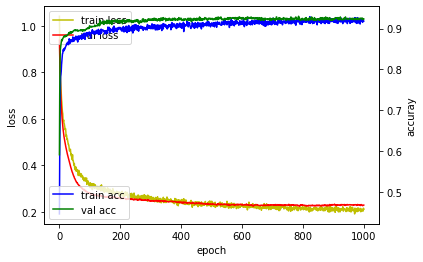

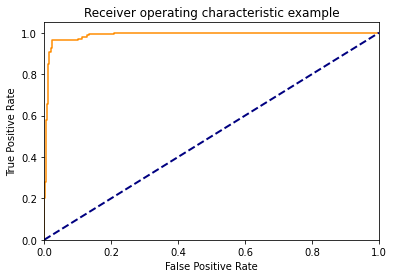





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_225 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_169 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_226 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_170 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_227 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_171 (Dropout)        (None, 4)                 0         
__________________

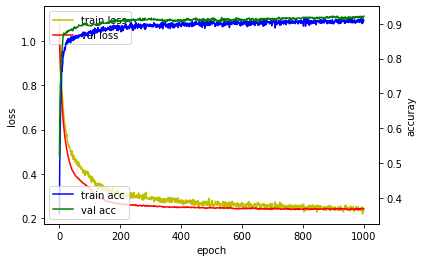

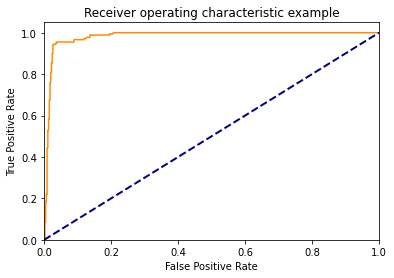





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_229 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_172 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_230 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_173 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_231 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_174 (Dropout)        (None, 8)                 0         
__________________

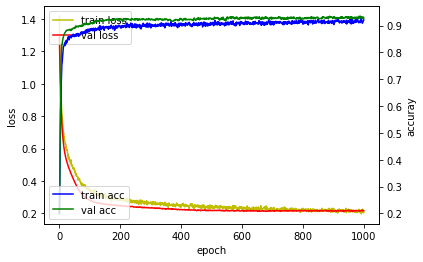

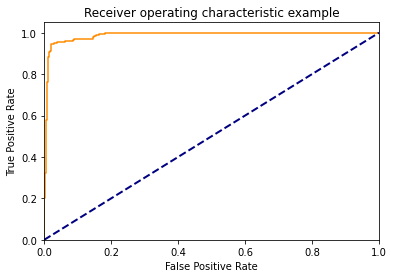





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_233 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_175 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_234 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_176 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_235 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_177 (Dropout)        (None, 16)                0         
_________________

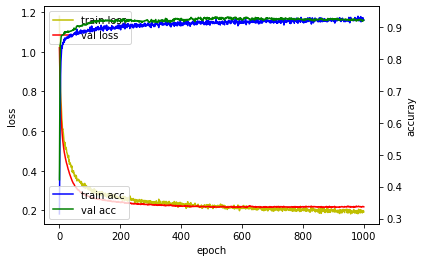

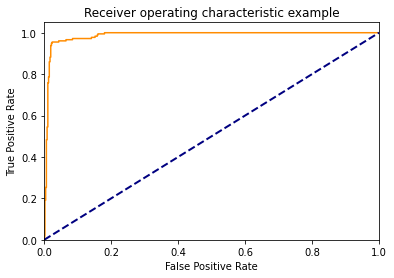





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_178 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_238 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_179 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_239 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_180 (Dropout)        (None, 32)                0         
_________________

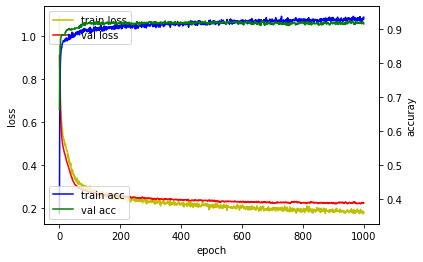

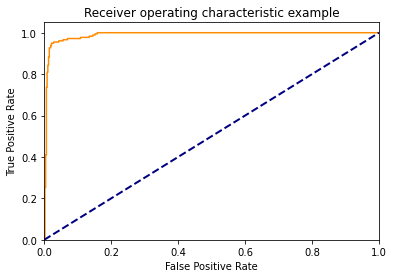





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_241 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_181 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_242 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_182 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_243 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_183 (Dropout)        (None, 4)                 0         
___________________

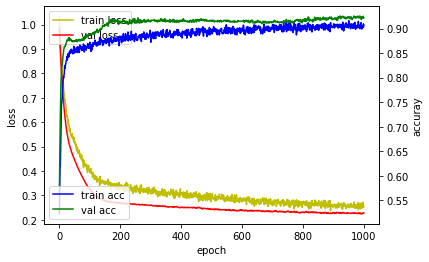

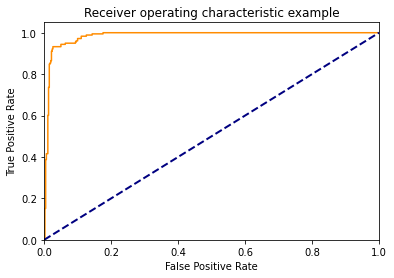





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_245 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_184 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_246 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_185 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_247 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_186 (Dropout)        (None, 8)                 0         
___________________

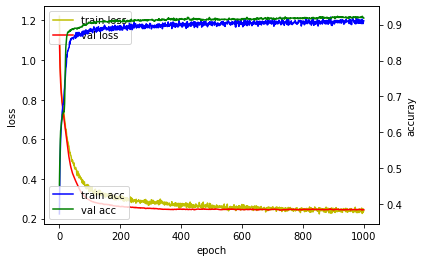

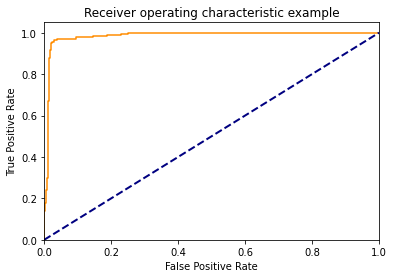





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_187 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_250 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_188 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_251 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_189 (Dropout)        (None, 16)                0         
__________________

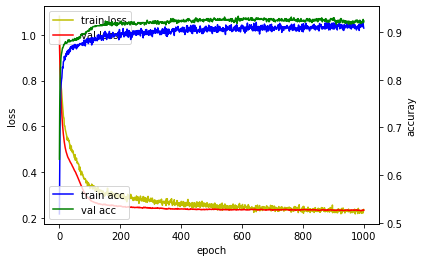

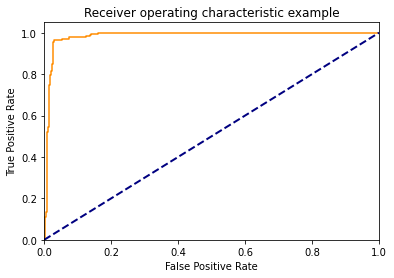





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_253 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_190 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_254 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_191 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_255 (Dense)            (None, 32)                288       
_________________________________________________________________
dropout_192 (Dropout)        (None, 32)                0         
__________________

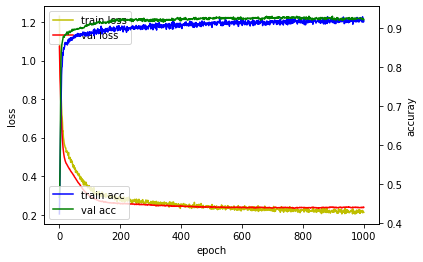

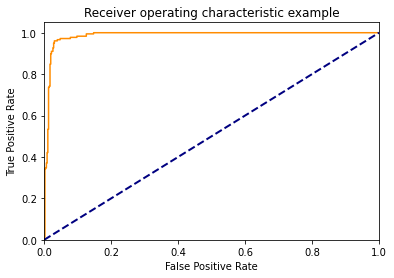





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_257 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_193 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_258 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_194 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_259 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_195 (Dropout)        (None, 4)                 0         
__________________

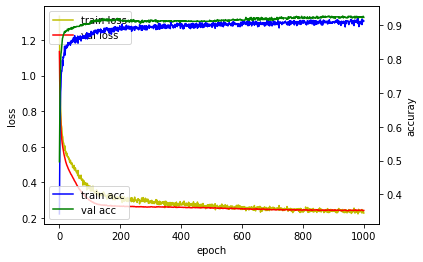

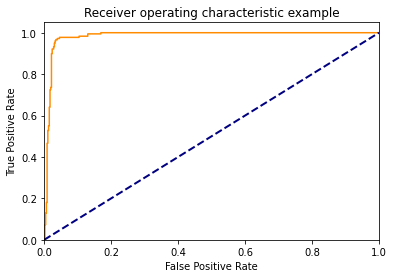





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_261 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_196 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_262 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_197 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_263 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_198 (Dropout)        (None, 8)                 0         
__________________

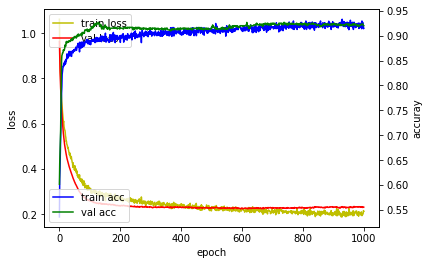

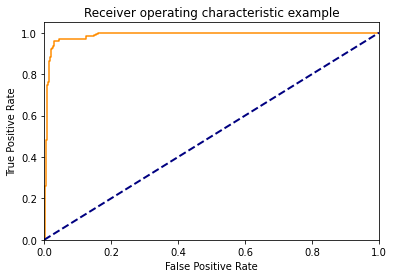





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_265 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_199 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_266 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_200 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_267 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_201 (Dropout)        (None, 16)                0         
_________________

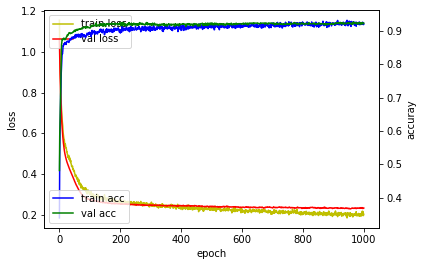

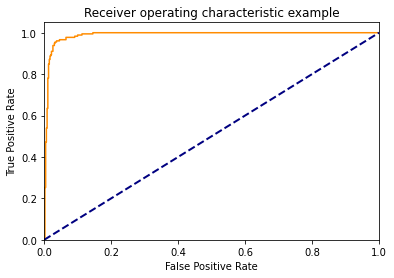





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_269 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_202 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_270 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_203 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_271 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_204 (Dropout)        (None, 32)                0         
_________________

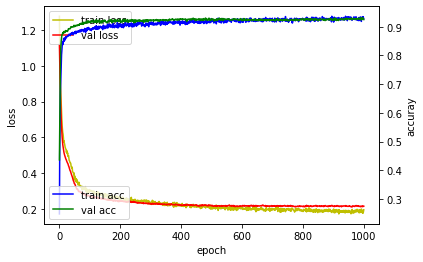

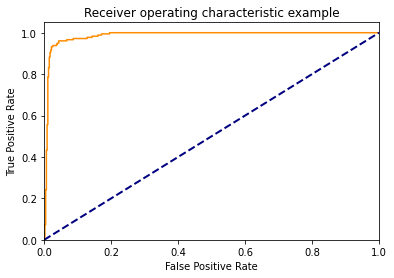





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_273 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_205 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_274 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_206 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_275 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_207 (Dropout)        (None, 4)                 0         
__________________

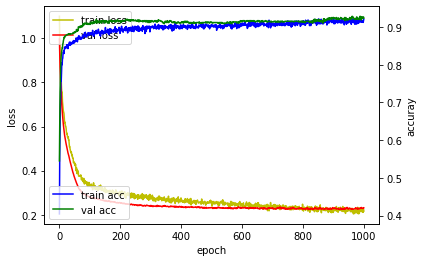

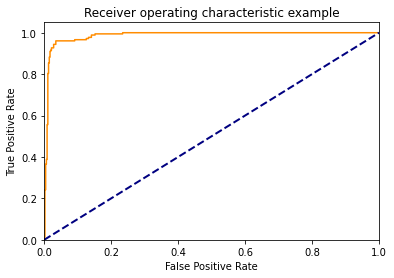





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_277 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_208 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_278 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_209 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_279 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_210 (Dropout)        (None, 8)                 0         
__________________

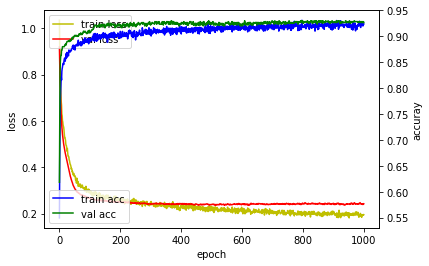

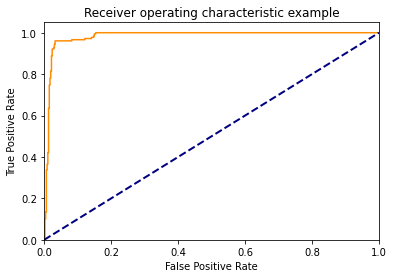





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_281 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_211 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_282 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_212 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_283 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_213 (Dropout)        (None, 16)                0         
_________________

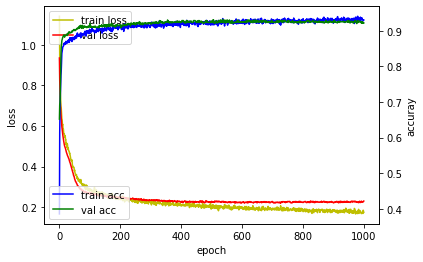

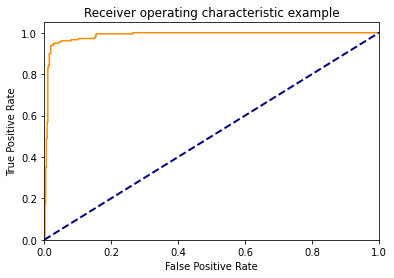





Activation: elu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_285 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_214 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_286 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_215 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_287 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_216 (Dropout)        (None, 32)                0         
_________________

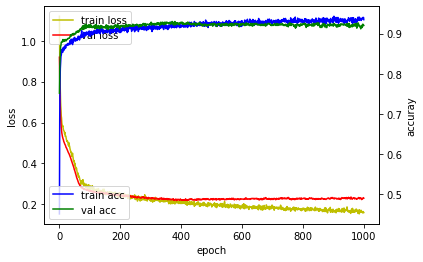

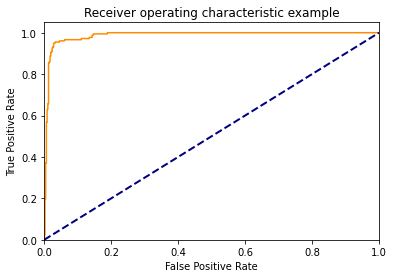





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_289 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_217 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_290 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_218 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_291 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_219 (Dropout)        (None, 4)                 0         
__________________

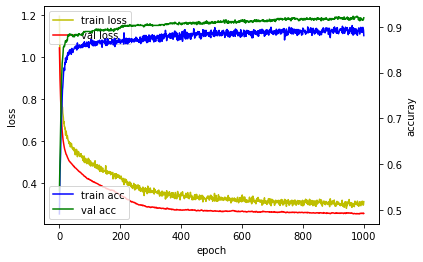

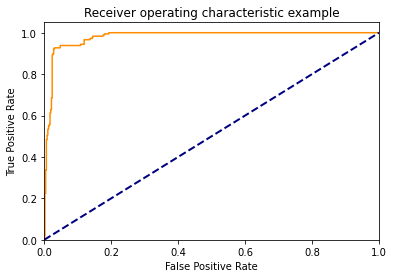





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_293 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_220 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_294 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_221 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_295 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_222 (Dropout)        (None, 8)                 0         
__________________

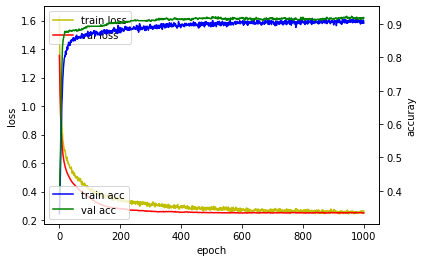

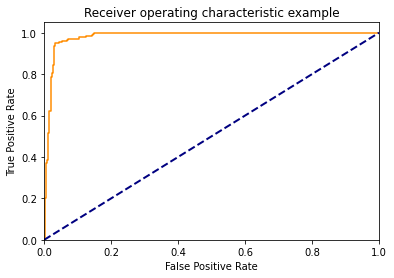





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_297 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_223 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_298 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_224 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_299 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_225 (Dropout)        (None, 16)                0         
_________________

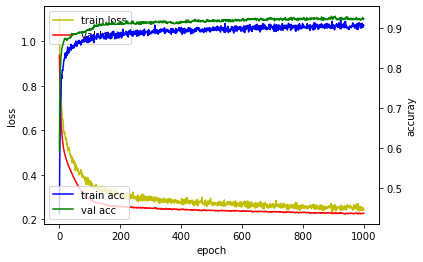

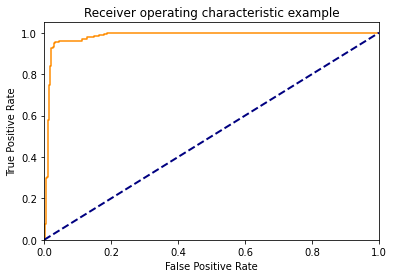





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_301 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_226 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_302 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_227 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_303 (Dense)            (None, 32)                288       
_________________________________________________________________
dropout_228 (Dropout)        (None, 32)                0         
_________________

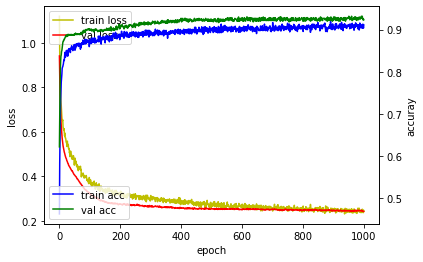

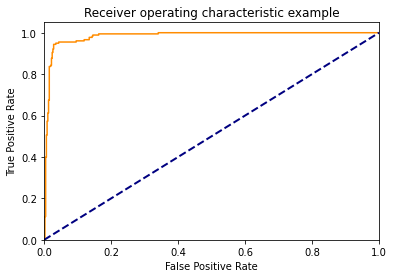





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_305 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_229 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_306 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_230 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_307 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_231 (Dropout)        (None, 4)                 0         
_________________

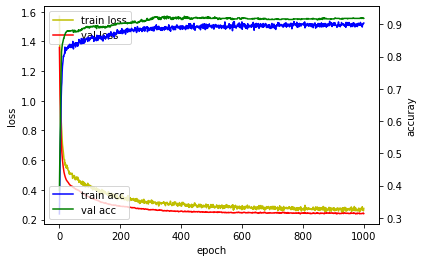

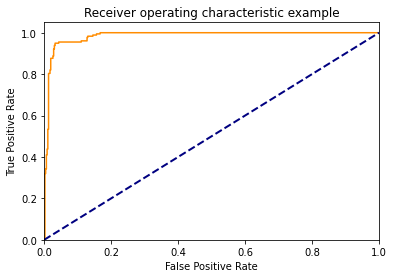





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_309 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_232 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_310 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_233 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_311 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_234 (Dropout)        (None, 8)                 0         
_________________

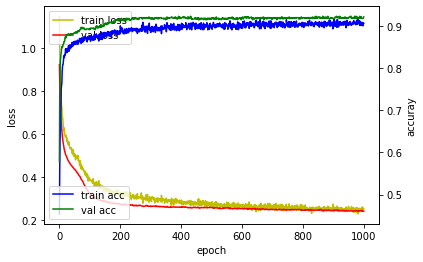

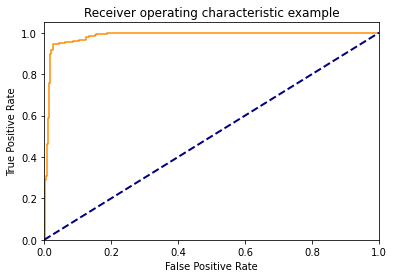





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_313 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_235 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_314 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_236 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_315 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_237 (Dropout)        (None, 16)                0         
________________

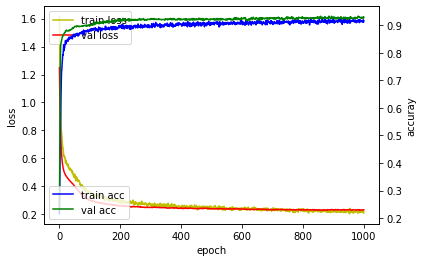

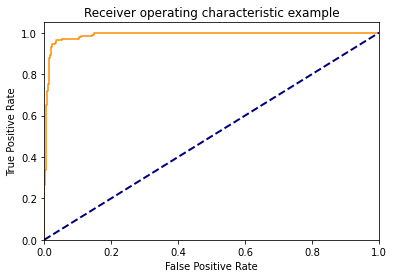





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_317 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_238 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_318 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_239 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_319 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_240 (Dropout)        (None, 32)                0         
________________

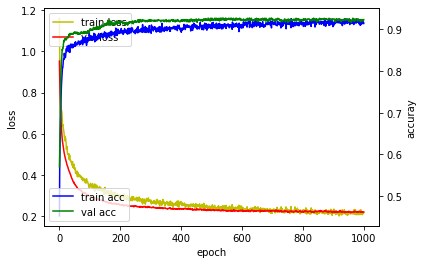

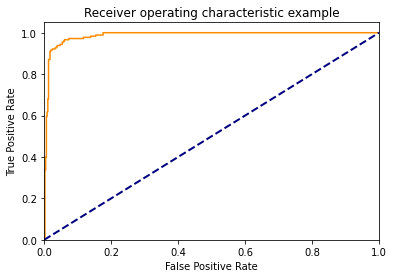





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_321 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_241 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_322 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_242 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_323 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_243 (Dropout)        (None, 4)                 0         
_________________

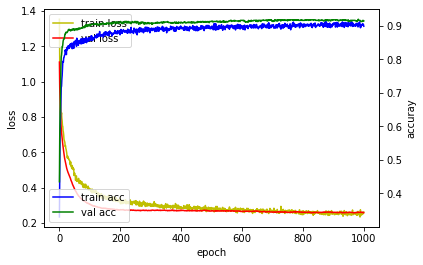

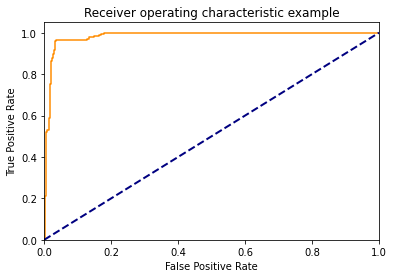





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_325 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_244 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_326 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_245 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_327 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_246 (Dropout)        (None, 8)                 0         
_________________

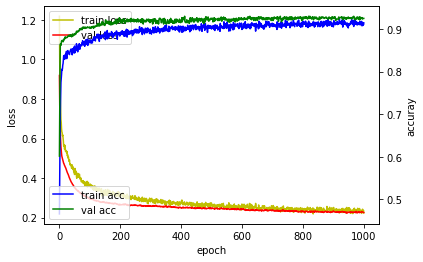

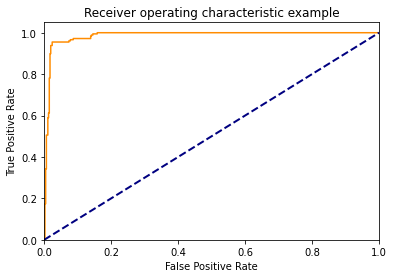





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_329 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_247 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_330 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_248 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_331 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_249 (Dropout)        (None, 16)                0         
________________

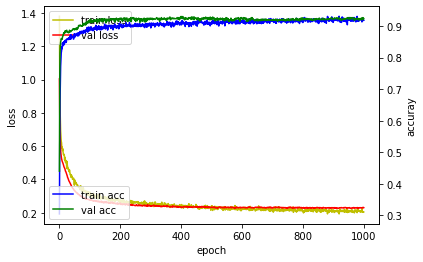

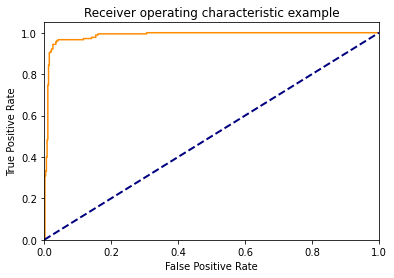





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 32 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_333 (Dense)            (None, 16)                208       
_________________________________________________________________
dropout_250 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_334 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_251 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_335 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_252 (Dropout)        (None, 32)                0         
________________

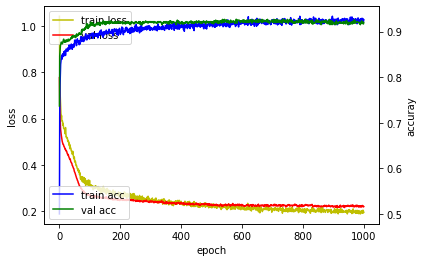

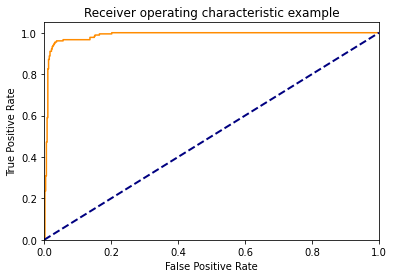





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_337 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_253 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_338 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_254 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_339 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_255 (Dropout)        (None, 4)                 0         
__________________

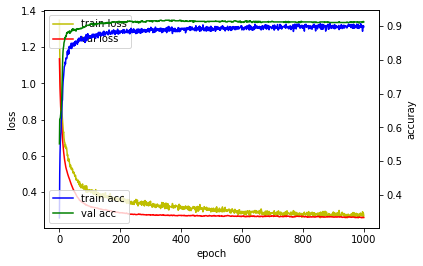

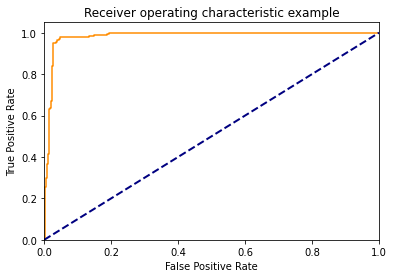





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_341 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_256 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_342 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_257 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_343 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_258 (Dropout)        (None, 8)                 0         
__________________

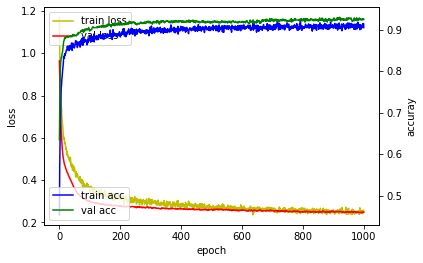

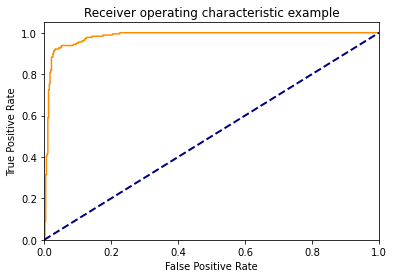





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_345 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_259 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_346 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_260 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_347 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_261 (Dropout)        (None, 16)                0         
_________________

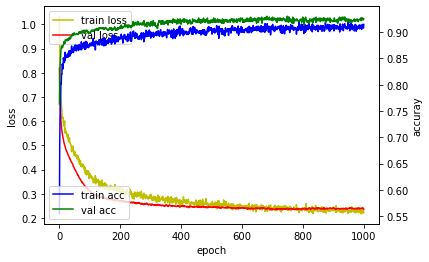

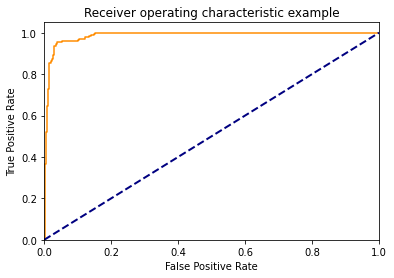





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_349 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_262 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_350 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_263 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_351 (Dense)            (None, 32)                288       
_________________________________________________________________
dropout_264 (Dropout)        (None, 32)                0         
_________________

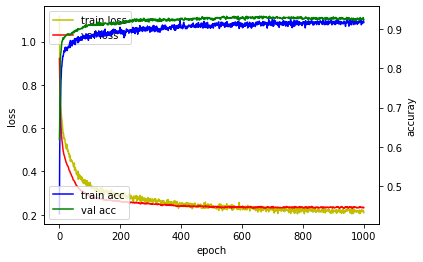

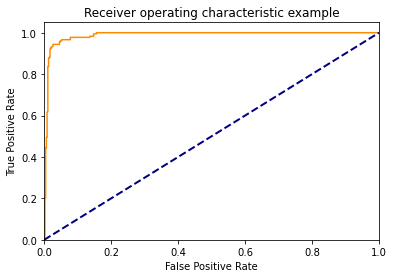





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_353 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_265 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_354 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_266 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_355 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_267 (Dropout)        (None, 4)                 0         
_________________

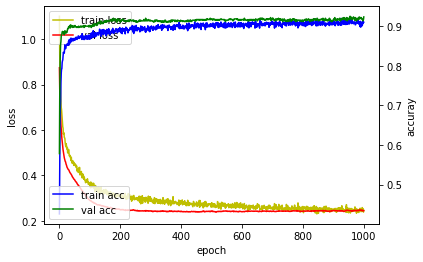

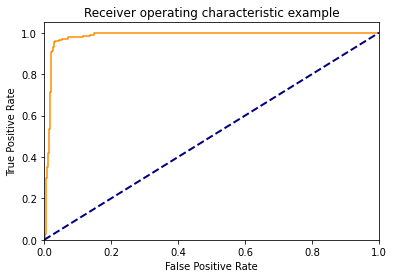





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_357 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_268 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_358 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_269 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_359 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_270 (Dropout)        (None, 8)                 0         
_________________

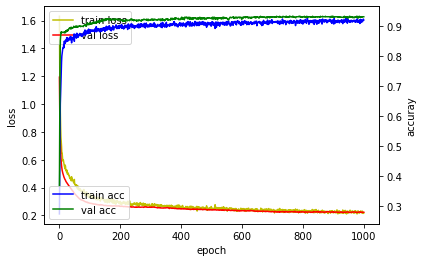

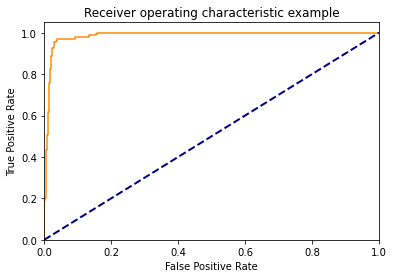





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_361 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_271 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_362 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_272 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_363 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_273 (Dropout)        (None, 16)                0         
________________

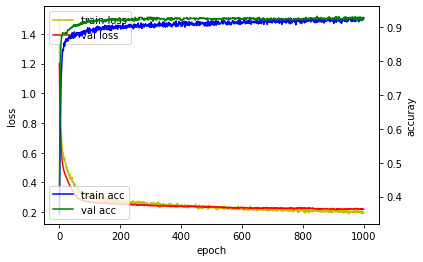

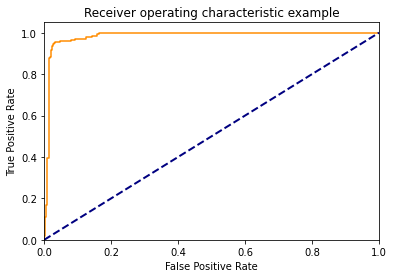





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_365 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_274 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_366 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_275 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_367 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_276 (Dropout)        (None, 32)                0         
________________

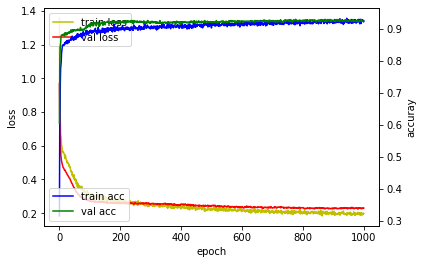

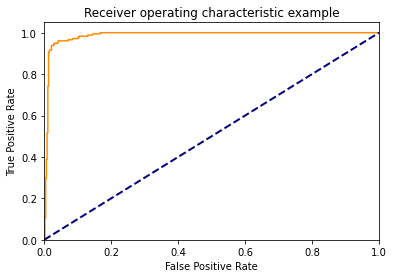





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_369 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_277 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_370 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_278 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_371 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_279 (Dropout)        (None, 4)                 0         
_________________

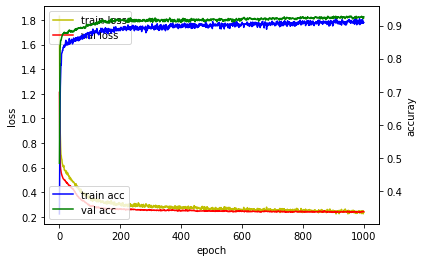

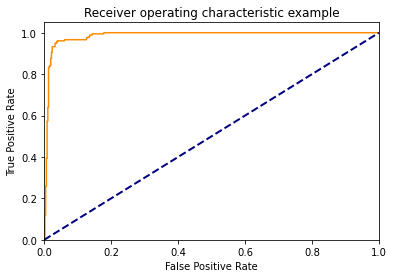





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 8 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_373 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_280 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_374 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_281 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_375 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_282 (Dropout)        (None, 8)                 0         
_________________

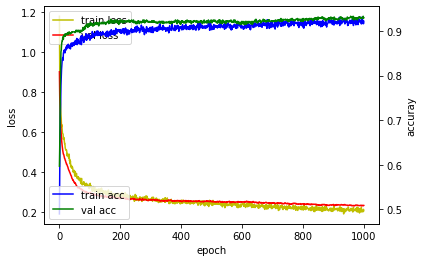

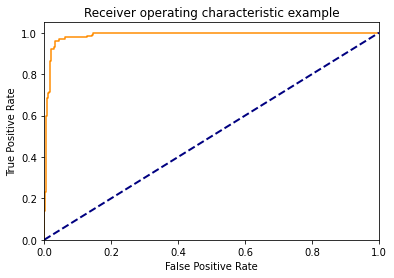





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 16 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_377 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_283 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_378 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_284 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_379 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_285 (Dropout)        (None, 16)                0         
________________

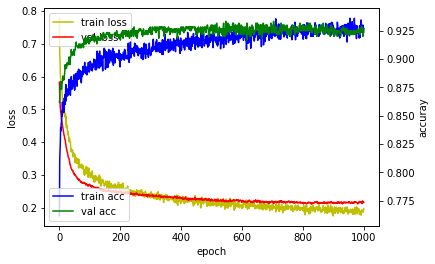

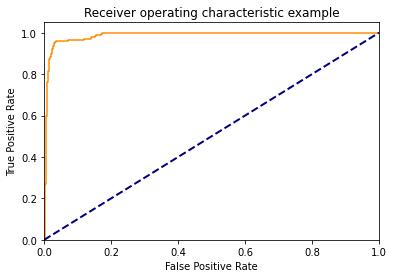





Activation: selu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 32 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_381 (Dense)            (None, 32)                416       
_________________________________________________________________
dropout_286 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_382 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_287 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_383 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_288 (Dropout)        (None, 32)                0         
________________

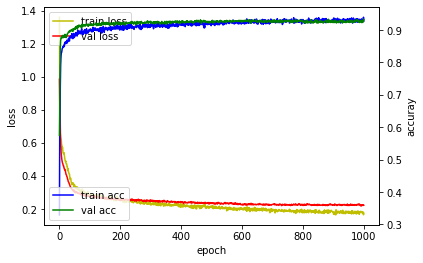

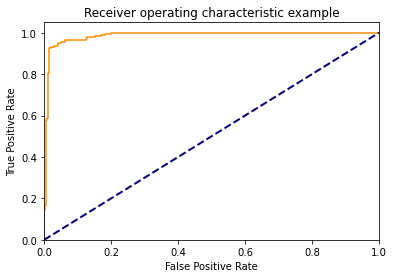

In [38]:
import numpy as np

num_epochs = 1000


actiFunc = ['relu', 'sigmoid', 'elu', 'selu']
lossFunc = ['categorical_crossentropy']
hidden = [3]
node = [
    [16, 8, 4], [16, 8, 8], [16, 8, 16], [16, 8, 32], [16, 16, 4], [16, 16, 8], [16, 16, 16], [16, 16, 32], [16, 32, 4], [16, 32, 8], [16, 32, 16], [16, 32, 32],
    [32, 8, 4], [32, 8, 8], [32, 8, 16], [32, 8, 32], [32, 16, 4], [32, 16, 8], [32, 16, 16], [32, 16, 32], [32, 32, 4], [32, 32, 8], [32, 32, 16], [32, 32, 32]
]
batchSize = [512]
dropout = [0.1]

all_acc_histories = []
all_loss_histories = []

for i in range(len(actiFunc)):
    for j in range(len(lossFunc)):
        for k in range(len(hidden)):
            for l in range(len(node)):
                for m in range(len(batchSize)):
                    for n in range(len(dropout)):
                        print('Activation:', actiFunc[i] , '  Loss:', lossFunc[j] , '  HiddenLayer:', hidden[k] , '  Node:[', node[l][0], ',', node[l][1] , ',', node[l][2], ']  BatchSize:', batchSize[m], '  Dropout:', dropout[n])
    
                        model = build_model(actiFunc[i], lossFunc[j], hidden[k], node[l], dropout[n])
                        model.summary()
                        history = model.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=num_epochs, batch_size=batchSize[m], verbose=False)
    
                        acc_history = history.history['val_acc']
                        all_acc_histories.append(acc_history)
                        loss_history = history.history['val_loss']
                        all_loss_histories.append(loss_history)
    
                        print('loss min :', min(loss_history), '  acc max:', max(acc_history))
                        print('loss mean :', np.mean(loss_history), '  acc mean:', np.mean(acc_history))
            
                        fig, loss_ax = plt.subplots()
                        acc_ax = loss_ax.twinx()

                        loss_ax.plot(history.history['loss'], 'y', label='train loss')
                        loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

                        acc_ax.plot(history.history['acc'], 'b', label='train acc')
                        acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

                        loss_ax.set_xlabel('epoch')
                        loss_ax.set_ylabel('loss')
                        acc_ax.set_ylabel('accuray')

                        loss_ax.legend(loc='upper left')
                        acc_ax.legend(loc='lower left')

                        plt.show()
                        
                        
                        y_val_cat_prob = model.predict_proba(test_data)
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(y_val_cat_prob)):
                            if(np.argmax(y_val_cat_prob[x]) == 2):
                                temp_test_data.append(max(y_val_cat_prob[x]))
                            else:
                                temp_test_data.append(1 - (max(y_val_cat_prob[x])))
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                                
                                
                        fpr, tpr, thresholds = roc_curve(temp_test_label, temp_test_data)
                        
                        
                        plt.figure()
                        lw = 2
                        plt.plot(fpr, tpr, color='darkorange')
                        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

                        plt.xlim([0.0, 1.0])
                        plt.ylim([0.0, 1.05])

                        plt.xlabel('False Positive Rate')
                        plt.ylabel('True Positive Rate')
                        plt.title('Receiver operating characteristic example')
                        plt.show()
                    
                        
                        print()
                        print()
                        print('=======================================================================================================')
                        print()
                        print()